# Linear Simple Regression
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

## Setup

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('/content/kc_house_data.csv')

## Exploratory Analysis

In [43]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [44]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [46]:
print(df.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

In [47]:
print(df.describe(include='all'))

                  id             date         price      bedrooms  \
count   2.161300e+04            21613  2.161300e+04  21613.000000   
unique           NaN              372           NaN           NaN   
top              NaN  20140623T000000           NaN           NaN   
freq             NaN              142           NaN           NaN   
mean    4.580302e+09              NaN  5.400881e+05      3.370842   
std     2.876566e+09              NaN  3.671272e+05      0.930062   
min     1.000102e+06              NaN  7.500000e+04      0.000000   
25%     2.123049e+09              NaN  3.219500e+05      3.000000   
50%     3.904930e+09              NaN  4.500000e+05      3.000000   
75%     7.308900e+09              NaN  6.450000e+05      4.000000   
max     9.900000e+09              NaN  7.700000e+06     33.000000   

           bathrooms   sqft_living      sqft_lot        floors    waterfront  \
count   21613.000000  21613.000000  2.161300e+04  21613.000000  21613.000000   
unique     

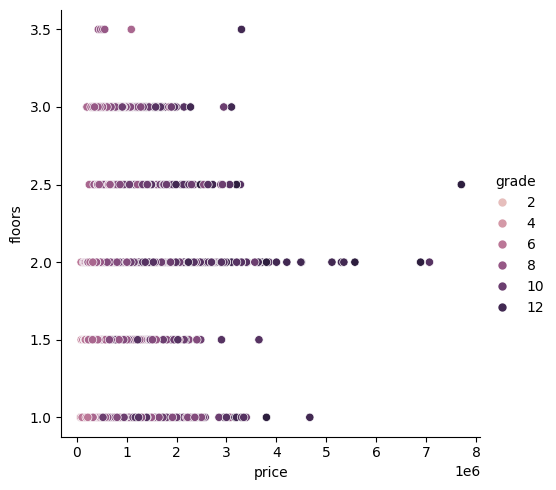

In [49]:
sns.relplot(data = df, x = 'price', y = 'floors', hue = 'grade')

## Try price with sqft_living

### Simple visualization

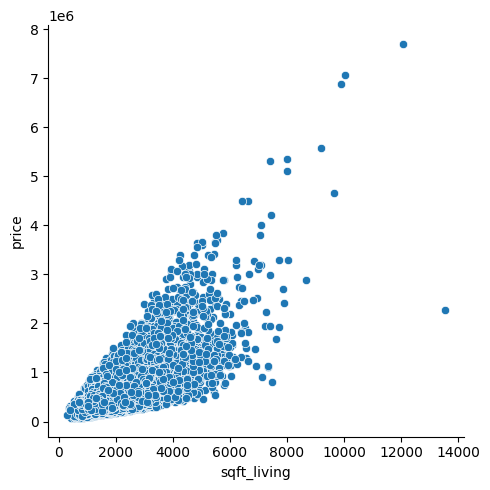

In [50]:
sns.relplot(data = df, x = 'sqft_living', y = 'price')

### Prepare independent variable

In [51]:
x = np.array(df['price']).reshape(-1,1)

### Prepare dependent variable

In [52]:
y = np.array(df['sqft_living']).reshape(-1, 1)

### Split train and test data

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

### Train the model

In [54]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
model = reg.fit(x_train, y_train)

In [55]:
model.coef_, model.intercept_

(array([[0.00174348]]), array([1136.4271757]))

### Evaluate the model

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: {} MSE: {} RMSE: {} R^2 {}'.format(mae, mse, rmse, r2))

MAE: 511.89859318714497 MSE: 427549.19082101167 RMSE: 427549.19082101167 R^2 0.4970190466797898


### Visualiza your result

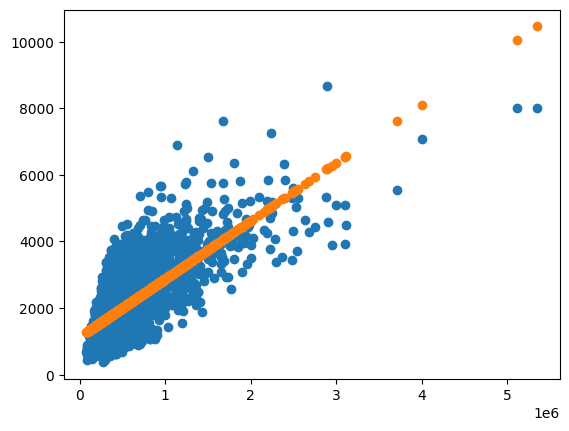

In [57]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred)

## Try price with year of construction

### simple visualization

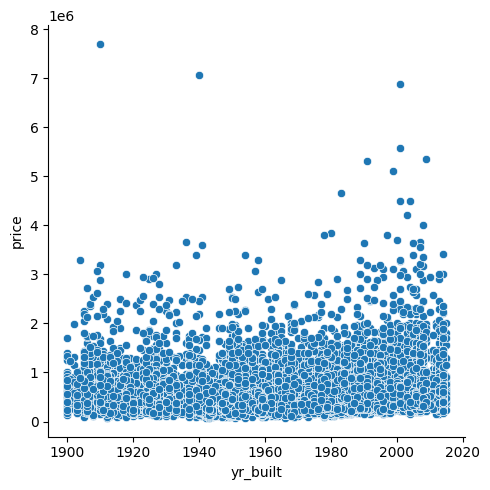

In [58]:
sns.relplot(data = df, x = 'yr_built', y = 'price')

### Prepare independent variable

In [59]:
x = np.array(df['yr_built']).reshape(-1,1)

### Prepare dependent variable

In [60]:
y = np.array(df['price']).reshape(-1,1)

### Split train and test data

In [61]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

### Train the model

In [62]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
model = reg.fit(x_train, y_train)

### Evaluate the model

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: {} MSE: {} RMSE: {} R^2 {}'.format(mae, mse, rmse, r2))

MAE: 228569.74792678538 MSE: 131778969822.0133 RMSE: 131778969822.0133 R^2 0.0017018307152145695


### Visualiza your result

In [64]:
model.coef_, model.intercept_

(array([[709.41153434]]), array([-857746.5042696]))

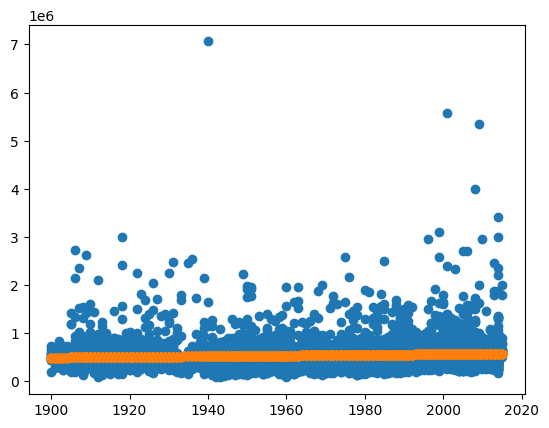

In [65]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred)

## Try price with sqft_lot

### simple visualization

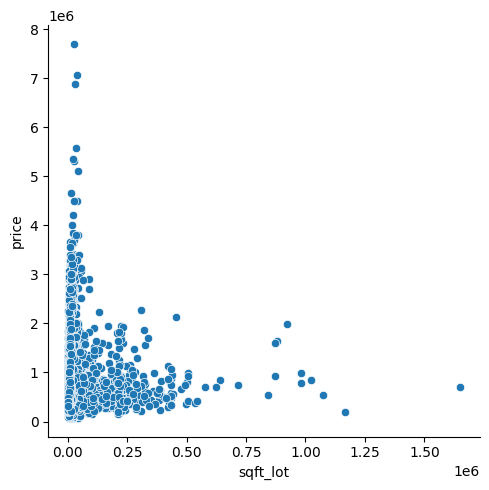

In [66]:
sns.relplot(data = df, x = 'sqft_lot', y = 'price')

### Prepare independent variable

In [67]:
x = np.array(df['sqft_lot']).reshape(-1,1)

### Prepare dependent variable

In [68]:
y = np.array(df['price']).reshape(-1,1)

### Split train and test data

In [69]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

### Train the model

In [70]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
model = reg.fit(x_train, y_train)

In [71]:
model.coef_, model.intercept_

(array([[0.75749477]]), array([529527.48967743]))

### Evaluate the model

In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: {} MSE: {} RMSE: {} R^2 {}'.format(mae, mse, rmse, r2))

MAE: 231617.7669892434 MSE: 133424252728.9591 RMSE: 133424252728.9591 R^2 0.00838114297225001


### Visualiza your result

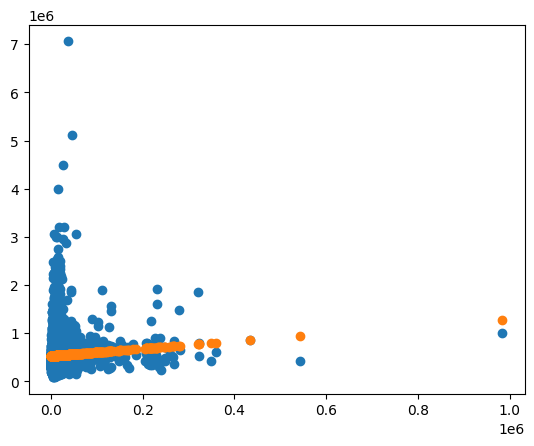

In [73]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred)